<a href="https://colab.research.google.com/github/Jency07/machine-learning/blob/main/Feature_Engineering_20MAI0026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ML Assessment 1 - Feature Engineering ***

***Team Members:***

Debasmita Pal 20MAI0018

Rajit Basu 20MAI0019

Nidhi Arun Ghuble 20MAI0020

Rajeshwaran 20MAI0021

Vrinda S.M 20MAI0023

ADITYA SHELKE 20MAI0024

KARDAS MANISH 20MAI0025

JENCY INFANCIA MARY J 20MAI0026


**Video link:**
https://drive.google.com/file/d/1aWzbbj4vgxo6lVSxDCPmhSvE8vLfZAIr/view?usp=sharing

[**Github link:**](https://github.com/Jency07/machine-learning/blob/main/Feature_Engineering_20MAI0026.ipynb)

***Importing libraries:***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Loading dataset***

In [2]:
from google.colab import files
uploaded=files.upload()

Saving ML DA 1 dataset.csv to ML DA 1 dataset.csv


In [5]:
#Load the data
df= pd.read_csv("ML DA 1 dataset.csv")
df

,Name,Type,Price,Area,BHK,Age,Pincode,Parking,Furnished,Occupany_certificate,Security,Nearest
0,Vasavi_Urban,Apartment,3900000,900,2,5,500090,Yes,Yes,No,Yes,Metro_Rail
1,Rivera_Villa,Villa,6000000,2500,3,20,636016,Yes,No,Yes,Yes,Airport
2,Lake_District,Apartment,7000000,950,2,13,700005,Yes,No,No,Yes,Airport
3,Shevaroys,Rent,40000,1000,2,18,600019,No,Yes,Yes,No,Railway_Station
4,Nitesh_Villa,Apartment,5000000,1500,3,40,560064,Yes,Yes,Yes,Yes,Airport
5,Atmosphere,Villa,9000000,1000,3,12,741356,Yes,Yes,Yes,Yes,Airport
6,Mapsko_Mount,Apartment,8720000,2650,3,3,122101,Yes,No,Yes,Yes,Metro_Rail
7,Golden Palms,Villa,2990000,900,2,11,140201,Yes,Yes,Yes,Yes,Bus_stand
8,Godrej,Apartment,44900000,111,2,25,560024,Yes,No,No,Yes,Metro_Rail
9,SBR_Meadow,Rent,22000,800,3,20,502300,Yes,No,No,Yes,Airport


***1. Displays the first 5 rows from the dataset***

In [6]:
df.head()

,Name,Type,Price,Area,BHK,Age,Pincode,Parking,Furnished,Occupany_certificate,Security,Nearest
0,Vasavi_Urban,Apartment,3900000,900,2,5,500090,Yes,Yes,No,Yes,Metro_Rail
1,Rivera_Villa,Villa,6000000,2500,3,20,636016,Yes,No,Yes,Yes,Airport
2,Lake_District,Apartment,7000000,950,2,13,700005,Yes,No,No,Yes,Airport
3,Shevaroys,Rent,40000,1000,2,18,600019,No,Yes,Yes,No,Railway_Station
4,Nitesh_Villa,Apartment,5000000,1500,3,40,560064,Yes,Yes,Yes,Yes,Airport


***2. Frequency Encoding***

In [7]:
# Count/frequency encoding is done for categorical features which has high cardinality instead of using one hot encoding
# Reduces curse of dimensionality
df_freq = df.Nearest.value_counts().to_dict()
df_freq

{'Airport': 5,
 'Airport ': 1,
 'Bus_stand': 3,
 'Metro_Rail': 6,
 'Railway_Station': 3}

In [8]:
df.Nearest = df.Nearest.map(df_freq)
df.Nearest

0     6
1     5
2     5
3     3
4     5
5     5
6     6
7     3
8     6
9     5
10    6
11    3
12    3
13    1
14    3
15    3
16    6
17    6
Name: Nearest, dtype: int64

***3. Top 3 Affordable Apartments***

In [14]:
#Display the top 3 affordable apartments
sorted=df.sort_values(by=['Price'])
affordable=[]
count=0
for i in range(df.shape[0]):
  if(sorted["Type"][i]=="Apartment" and count!=3):
    affordable.append(sorted.iloc[i])
    count=count+1
affordable =pd.DataFrame(affordable)
affordable

,Name,Type,Price,Area,BHK,Age,Pincode,Parking,Furnished,Occupany_certificate,Security,Nearest
14,Paradise,Rent,20000,1200,3,11,413501,Yes,No,Yes,No,3
3,Shevaroys,Rent,40000,1000,2,18,600019,No,Yes,Yes,No,3
0,Vasavi_Urban,Apartment,3900000,900,2,5,500090,Yes,Yes,No,Yes,6


***4. Number of apartments near to the metro***

In [15]:
#Find the count of properties that are Apartment Type and Have metros near to it

Residential=df[df['Type']=='Apartment']

Residential_Metro=Residential[Residential['Nearest']=='Metro_Rail']

Residential_Metro.shape[0]
uniques=list(df['Type'].unique())
d={}
k=0
for i in uniques:
    if i not in d:
        d[i]=k
        k+=1
df['Type']=df['Type'].map(d)
print("The mapping is: ",d)
df.head()

The mapping is:  {'Apartment': 0, 'Villa': 1, 'Rent': 2, 'Apartment ': 3, 'Residential': 4}


,Name,Type,Price,Area,BHK,Age,Pincode,Parking,Furnished,Occupany_certificate,Security,Nearest
0,Vasavi_Urban,0,3900000,900,2,5,500090,Yes,Yes,No,Yes,6
1,Rivera_Villa,1,6000000,2500,3,20,636016,Yes,No,Yes,Yes,5
2,Lake_District,0,7000000,950,2,13,700005,Yes,No,No,Yes,5
3,Shevaroys,2,40000,1000,2,18,600019,No,Yes,Yes,No,3
4,Nitesh_Villa,3,5000000,1500,3,40,560064,Yes,Yes,Yes,Yes,5


***5. Normalization of price and area attributes using standard scaler***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


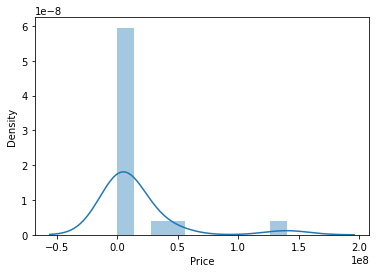

In [16]:
#Since price and Area are normally distributed StandardScaler is used to normalize the values
sns.distplot(df["Price"],kde = True,bins = 10)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

df["Price"] = scaler.fit_transform(df["Price"].values.reshape(-1,1))
df["Area"] = scaler.fit_transform(df["Area"].values.reshape(-1,1))

In [18]:
df.Price

0    -0.363361
1    -0.298325
2    -0.267356
3    -0.482903
4    -0.329295
5    -0.205417
6    -0.214088
7    -0.391543
8     0.906386
9    -0.483461
10   -0.360264
11   -0.375749
12   -0.422203
13    0.578110
14   -0.483522
15   -0.313810
16    3.851580
17   -0.344779
Name: Price, dtype: float64

***6. One hot Encoding of features with 2 values***

In [19]:
# Performing one hot encoding for all the features containing two variables
df['Parking']=df['Parking'].map({'Yes':1,'No':0})
df['Furnished']=df['Furnished'].map({'Yes':1,'No':0})
df['Occupany_certificate']=df['Occupany_certificate'].map({'Yes':1,'No':0})
df['Security']=df['Security'].map({'Yes':1,'No':0})

In [20]:
df.head()

,Name,Type,Price,Area,BHK,Age,Pincode,Parking,Furnished,Occupany_certificate,Security,Nearest
0,Vasavi_Urban,0,-0.363361,-0.592385,2,5,500090,1,1,0,1,6
1,Rivera_Villa,1,-0.298325,0.028613,3,20,636016,1,0,1,1,5
2,Lake_District,0,-0.267356,-0.572979,2,13,700005,1,0,0,1,5
3,Shevaroys,2,-0.482903,-0.553573,2,18,600019,0,1,1,0,3
4,Nitesh_Villa,3,-0.329295,-0.359511,3,40,560064,1,1,1,1,5


***7. Construction of new features from raw data***

In [21]:
#Creating a state column from pincode data
state=[]
for i in range(df.shape[0]):
  
  if(df['Pincode'][i].astype(str).startswith('5')):
    state.append("Andhra Pradesh")
   
  elif(df['Pincode'][i].astype(str).startswith('6')):
    state.append("TamilNadu")
  
  elif(df['Pincode'][i].astype(str).startswith('7')):   
    state.append("West Bengal")
  
  elif(df['Pincode'][i].astype(str).startswith('1')):
    state.append("Delhi")
  
  elif(df['Pincode'][i].astype(str).startswith('2')):
    state.append("Uttar Pradesh")

  elif(df['Pincode'][i].astype(str).startswith('4')):  
    state.append("Maharastra")

df["State"]=state
df

,Name,Type,Price,Area,BHK,Age,Pincode,Parking,Furnished,Occupany_certificate,Security,Nearest,State
0,Vasavi_Urban,0,-0.363361,-0.592385,2,5,500090,1,1,0,1,6,Andhra Pradesh
1,Rivera_Villa,1,-0.298325,0.028613,3,20,636016,1,0,1,1,5,TamilNadu
2,Lake_District,0,-0.267356,-0.572979,2,13,700005,1,0,0,1,5,West Bengal
3,Shevaroys,2,-0.482903,-0.553573,2,18,600019,0,1,1,0,3,TamilNadu
4,Nitesh_Villa,3,-0.329295,-0.359511,3,40,560064,1,1,1,1,5,Andhra Pradesh
5,Atmosphere,1,-0.205417,-0.553573,3,12,741356,1,1,1,1,5,West Bengal
6,Mapsko_Mount,0,-0.214088,0.086832,3,3,122101,1,0,1,1,6,Delhi
7,Golden Palms,1,-0.391543,-0.592385,2,11,140201,1,1,1,1,3,Delhi
8,Godrej,3,0.906386,-0.898615,2,25,560024,1,0,0,1,6,Andhra Pradesh
9,SBR_Meadow,2,-0.483461,-0.631198,3,20,502300,1,0,0,1,5,Andhra Pradesh


***8. Renaming feature names***

In [23]:
## name the columns as col1, col2..col12
varnames=['Col'+str(s) for s in range(1,14)]                   
df.columns=varnames
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13
0,Vasavi_Urban,0,-0.363361,-0.592385,2,5,500090,1,1,0,1,6,Andhra Pradesh
1,Rivera_Villa,1,-0.298325,0.028613,3,20,636016,1,0,1,1,5,TamilNadu
2,Lake_District,0,-0.267356,-0.572979,2,13,700005,1,0,0,1,5,West Bengal
3,Shevaroys,2,-0.482903,-0.553573,2,18,600019,0,1,1,0,3,TamilNadu
4,Nitesh_Villa,3,-0.329295,-0.359511,3,40,560064,1,1,1,1,5,Andhra Pradesh
